# Train Various Regression Models and Compare Their Performances

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
filename = os.path.join(os.getcwd(), "data", "airbnbData_train.csv")
df = pd.read_csv(filename, header=0)

RMSE:<br>
RMSE finds the average difference between the predicted values and the actual values. We will compute the RMSE on the test set. Since RMSE finds the difference between the predicted and actual values, lower RMSE values indicate good performance - the model fits the data well and makes more accurate predictions. On the other hand, higher RSME values indicate that the model is not performing well.

$R^2$:<br>
$R^2$ is a measure of the proportion of variability in the prediction that the model was able to make using the test data. Since $R^2$ measures how well the model fits the data, a higher $R^2$ value indicates that good performance and a lower $R^2$ indicates that poor performance.

In [3]:
y = df["price"]
X = df.drop(columns = "price", axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Liner Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

In [7]:
# Compute the RMSE 
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)

# Compute the R2 score
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.738622483889047
[LR] R2: 0.41979482347024133


C:\Users\sophi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Decision Tree Using GridSearch

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
param_grid = {"max_depth":[4,8], "min_samples_leaf":[25,50]}

In [10]:
print('Running Grid Search...')

dt_regressor = DecisionTreeRegressor()

# Run a Grid Search with 3-fold cross-validation

dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring="neg_root_mean_squared_error")
dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')


Running Grid Search...
Done


In [11]:
# Prints RMSE score of beset model
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.74


In [12]:
dt_best_params = dt_grid_search.best_params_

dt_best_params

{'max_depth': 8, 'min_samples_leaf': 25}

In [13]:
# YOUR CODE HERE
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)

In [14]:
# Use fitted model to make predictions on the test data
y_dt_pred = dt_model.predict(X_test)

# ompute the RMSE 
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)

# Compute the R2 score 
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.6730810691368487
[DT] R2: 0.5181949986280694


C:\Users\sophi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Ensemble Models: Stacking 

In [15]:
from sklearn.ensemble import StackingRegressor

In [16]:
estimators = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)),
              ("LR", LinearRegression())
             ]

In [17]:
print('Implement Stacking...')

# YOUR CODE HERE
stacking_model = StackingRegressor(estimators=estimators, passthrough=False)
stacking_model.fit(X_train, y_train)

print('End')

Implement Stacking...
End


In [18]:
# Use fitted model to make predictions on the test data
stacking_pred = stacking_model.predict(X_test)

# Compute the RMSE 
stack_rmse = mean_squared_error(y_test, stacking_pred, squared=False)

# 3. Compute the R2 score
stack_r2 = r2_score(y_test, stacking_pred)
   
print('Root Mean Squared Error: {0}'.format(stack_rmse))
print('R2: {0}'.format(stack_r2))                       

Root Mean Squared Error: 0.667882586534154
R2: 0.5256086157706066


C:\Users\sophi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Gradient Boosted Decision Trees 

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
print('Begin GBDT Implementation...')

gbdt_model = GradientBoostingRegressor(max_depth=2, n_estimators=300)
gbdt_model.fit(X_train, y_train)

print('End')

Begin GBDT Implementation...
End


In [21]:
# Use fitted model to make predictions on the test data
y_gbdt_pred = gbdt_model.predict(X_test)

# Compute the RMSE 
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)

# Compute the R2 score 
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 

[GBDT] Root Mean Squared Error: 0.6252506436522164
[GBDT] R2: 0.584237948244682


C:\Users\sophi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
print('Begin RF Implementation...')

rf_model = RandomForestRegressor(max_depth=32, n_estimators=300)
rf_model.fit(X_train, y_train)

print('End')

Begin RF Implementation...
End


In [24]:
# Use fitted model to make predictions on the test data
y_rf_pred = rf_model.predict(X_test)

# Compute the RMSE 
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)

# Compute the R2 score 
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))                 

[RF] Root Mean Squared Error: 0.5977718978764183
[RF] R2: 0.6199790486731067


C:\Users\sophi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Compare Model Performance

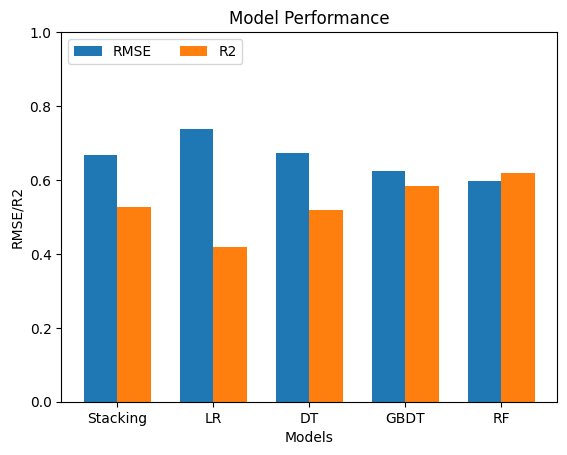

In [25]:
RMSE_Results = [stack_rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [stack_r2, lr_r2, dt_r2, gbdt_r2, rf_r2]

rg= np.arange(5)
width = 0.35

# Create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width, label='RMSE')

# Create bar plot with R2 results
plt.bar(rg+width, R2_Results, width, label='R2')


labels = ['Stacking','LR', 'DT', 'GBDT', 'RF']
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")


plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()


The RF model is the best performing model with the lowest RMSE and a relatively high R². All ensemble models (Stacking, GBDT, and RF) perform better than the individual models (LR and DT) since the non-ensemble models have a higher RMSE and lower R² indicating poorer performance. Among the ensemble models, Random Forest stands out due to its lower RMSE and higher R².